## List of Machine Learning Algorithms performed on Iris Dataset
### 1. Logistic Regression
### 2. Decision Tree Classification
### 3. SVM
### 4. Random Forest
### 5. K-Means Clustering

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
dff = load_iris()

In [2]:
dir(dff)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
df = pd.DataFrame(dff.data, columns = dff.feature_names)

In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
dff.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X = df
y = dff.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

### Logistic Regression

In [8]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9473684210526315

In [9]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10)

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.8       , 0.93333333, 1.        , 1.        ])

### Decision Tree Classification

In [10]:

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.9473684210526315

In [11]:
cross_val_score(DecisionTreeClassifier(random_state=0), X, y,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

### SVM (Support Vector Machine)

In [12]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)


1.0

In [13]:
cross_val_score(SVC(gamma='auto'),X,y,cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

### Random Forest

In [14]:
rf = RandomForestClassifier(n_estimators=12)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9210526315789473

In [15]:
cross_val_score(RandomForestClassifier(n_estimators=40),X,y,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 0.93333333, 1.        , 1.        ])

### K-Means Clustering

In [16]:
df = df.drop(df[['sepal length (cm)','sepal width (cm)']],axis = 1)

In [17]:
X = df
from sklearn.cluster import KMeans

k_range = range(1,11)

sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.025145110250374,
 9.185075914423741,
 7.615402244955953,
 6.480259206692711,
 5.781392651466178]

Text(0.5, 1.0, 'Elbow Method')

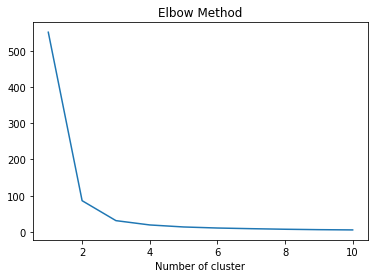

In [18]:
plt.plot(k_range,sse)
plt.xlabel('Number of cluster')
plt.title('Elbow Method')

In [19]:
# Applying Kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [20]:
kmeans.score(X,dff.target)

-31.371358974359154

In [21]:
X['Cluster'] = y_kmeans

In [22]:
X.Cluster.unique()

array([0, 2, 1], dtype=int64)

In [23]:
X1 = X[X.Cluster==0]
X2 = X[X.Cluster==1]
X3 = X[X.Cluster==2]

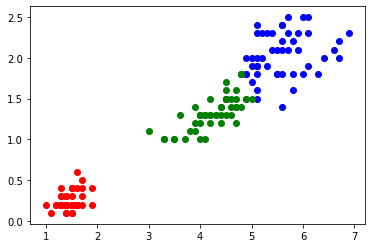

In [24]:
plt.scatter(X1['petal length (cm)'],X1['petal width (cm)'],color='red')
plt.scatter(X2['petal length (cm)'],X2['petal width (cm)'],color='blue')
plt.scatter(X3['petal length (cm)'],X3['petal width (cm)'],color='green')